# 中文商品评价情感分析（SVM实现）
本项目使用SVM算法对中文商品评价进行情感分类。

In [1]:
!pip install jieba

In [2]:
!pip install wordcloud

In [3]:
#导入库
import jieba
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [4]:
#读取中文数据：分别读取正面、负面和测试集评论，每行一条，去除空行。
with open('chinese_pos.txt', 'r', encoding='utf-8') as f:
    pos_reviews = [line.strip() for line in f if line.strip()]
with open('chinese_neg.txt', 'r', encoding='utf-8') as f:
    neg_reviews = [line.strip() for line in f if line.strip()]
with open('chinese.txt', 'r', encoding='utf-8') as f:
    test_reviews = [line.strip() for line in f if line.strip()]

print(f'正样本数: {len(pos_reviews)}，负样本数: {len(neg_reviews)}，测试样本数: {len(test_reviews)}')

正样本数: 17822，负样本数: 17588，测试样本数: 7500


In [5]:
#数据分词：分词后每条评论变为用空格分隔的词序列，便于后续特征提取。
# 定义分词函数，使用jieba对每条评论进行分词
def cut_texts(texts):
    return [' '.join(jieba.cut(text)) for text in texts]
# 合并训练集和标签
train_texts = pos_reviews + neg_reviews
train_labels = [1] * len(pos_reviews) + [0] * len(neg_reviews)
# 对训练集和测试集进行分词
train_texts_cut = cut_texts(train_texts)
test_texts_cut = cut_texts(test_reviews)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\29513\AppData\Local\Temp\jieba.cache
Loading model cost 0.878 seconds.
Prefix dict has been built successfully.


C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from current font.
  fig.canvas.print_figure(bytes_

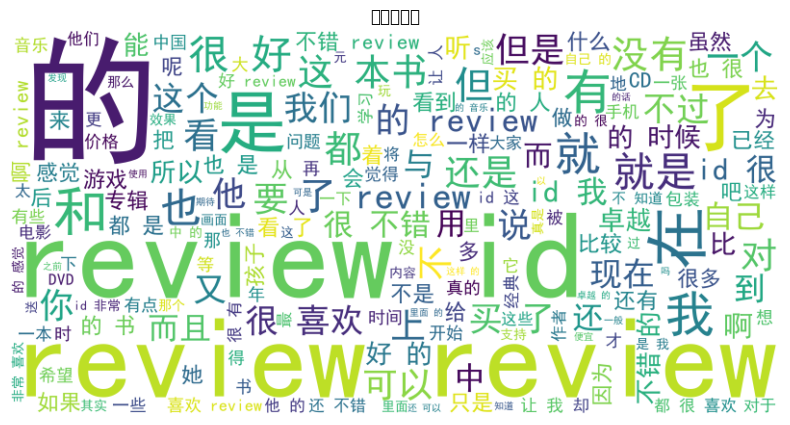

C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


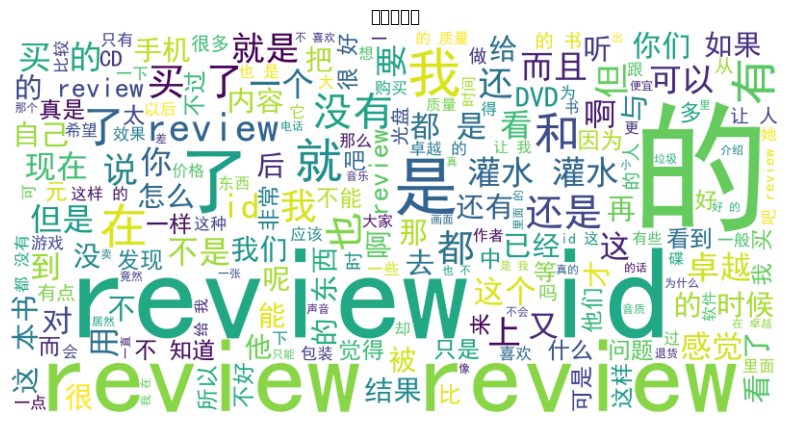

In [6]:
# 可视化：用词云直观展示正负样本的高频词分布，便于分析数据特征。
# 生成正样本词云
text_pos = ' '.join(train_texts_cut[:len(pos_reviews)])
text_neg = ' '.join(train_texts_cut[len(pos_reviews):])

wc_pos = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white').generate(text_pos)
plt.figure(figsize=(10,5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('正样本词云')
plt.show()
# 生成负样本词云
wc_neg = WordCloud(font_path='simhei.ttf', width=800, height=400, background_color='white').generate(text_neg)
plt.figure(figsize=(10,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('负样本词云')
plt.show()

C:\Users\29513\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from cu

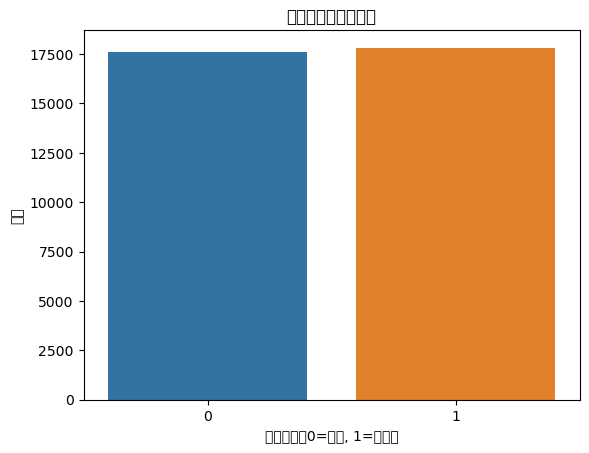

In [7]:
# 可视化：训练集正负样本数量统计，用柱状图展示正负样本数量，判断数据集是否均衡。
sns.countplot(x=train_labels)
plt.title('训练集正负样本分布')
plt.xlabel('情感标签（0=负面, 1=正面）')
plt.ylabel('数量')
plt.show()

In [8]:
# 高频词统计：统计所有训练样本中的高频词，分析数据特征和分布。
all_words = ' '.join(train_texts_cut).split()
word_counts = Counter(all_words)
print("高频词前20：", word_counts.most_common(20))

高频词前20： [('，', 25970), ('的', 21786), ('"', 20275), ('<', 20000), ('review', 20000), ('>', 20000), ('/', 10267), ('。', 10215), ('=', 10139), ('id', 10004), ('了', 8372), ('！', 6290), ('是', 5501), ('我', 4917), (',', 4504), ('很', 3709), ('也', 2710), ('在', 2589), ('都', 2516), ('有', 2500)]


In [9]:
#特征提取（TF-IDF）：用TF-IDF方法将文本转为数值特征向量，便于机器学习模型处理。
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts_cut)
X_test = vectorizer.transform(test_texts_cut)

In [10]:
#训练SVM模型：使用线性核的SVM进行情感分类模型训练。
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, train_labels)

SVC(kernel='linear', probability=True)

In [11]:
#测试集预测与保存结果：对测试集进行情感预测，并将结果保存为csv文件，便于后续分析和提交。
test_pred = clf.predict(X_test)
pd.DataFrame({'id': range(len(test_pred)), 'label': test_pred}).to_csv('svm_test_pred.csv', index=False)
print('预测结果已保存为 svm_test_pred.csv')

预测结果已保存为 svm_test_pred.csv


In [12]:
#查看部分预测结果：展示部分预测结果，便于人工核查和结果说明。
pd.DataFrame({'id': range(len(test_pred)), 'label': test_pred}).head(10)

,id,label
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  fig.canvas.print_figure(bytes_

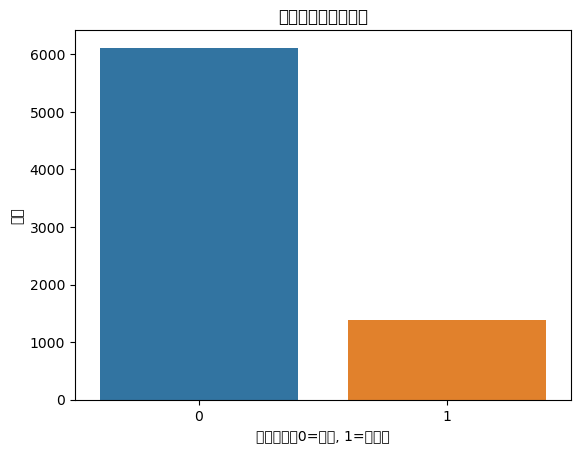

In [13]:
# 可视化：测试集预测分布，用柱状图展示测试集预测的正负面分布，分析模型预测倾向。
sns.countplot(x=test_pred)
plt.title('测试集情感预测分布')
plt.xlabel('情感标签（0=负面, 1=正面）')
plt.ylabel('数量')
plt.show()

# 英文商品评价情感分析（SVM实现）
本项目使用SVM算法对英文商品评价进行情感分类。

In [14]:
# 读取英文正负样本和测试集
with open('eng_pos.txt', 'r', encoding='utf-8') as f:
    eng_pos_reviews = [line.strip() for line in f if line.strip()]
with open('eng_neg.txt', 'r', encoding='utf-8') as f:
    eng_neg_reviews = [line.strip() for line in f if line.strip()]
with open('eng.txt', 'r', encoding='utf-8') as f:
    eng_test_reviews = [line.strip() for line in f if line.strip()]

print(f'英文正样本数: {len(eng_pos_reviews)}，负样本数: {len(eng_neg_reviews)}，测试样本数: {len(eng_test_reviews)}')

英文正样本数: 21538，负样本数: 22765，测试样本数: 11108


In [15]:
# 特征提取与模型训练
eng_train_texts = eng_pos_reviews + eng_neg_reviews
eng_train_labels = [1] * len(eng_pos_reviews) + [0] * len(eng_neg_reviews)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer_eng = TfidfVectorizer(max_features=5000)
X_train_eng = vectorizer_eng.fit_transform(eng_train_texts)
X_test_eng = vectorizer_eng.transform(eng_test_reviews)

clf_eng = SVC(kernel='linear', probability=True)
clf_eng.fit(X_train_eng, eng_train_labels)

SVC(kernel='linear', probability=True)

In [16]:
# 预测与保存英文结果
eng_test_pred = clf_eng.predict(X_test_eng)
pd.DataFrame({'id': range(len(eng_test_pred)), 'label': eng_test_pred}).to_csv('svm_eng_test_pred.csv', index=False)
print('英文预测结果已保存为 svm_eng_test_pred.csv')

英文预测结果已保存为 svm_eng_test_pred.csv


In [17]:
# 查看部分英文预测结果
pd.DataFrame({'id': range(len(eng_test_pred)), 'label': eng_test_pred}).head(10)

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,1
8,8,0
9,9,0


C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\29513\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
  fig.canvas.print_figure(bytes_

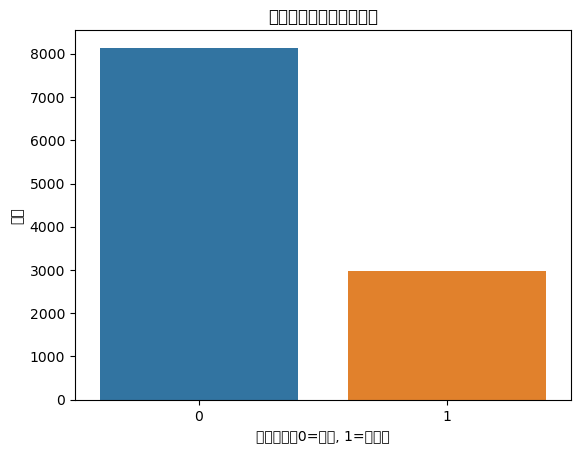

In [18]:
# 英文预测分布可视化
sns.countplot(x=eng_test_pred)
plt.title('英文测试集情感预测分布')
plt.xlabel('情感标签（0=负面, 1=正面）')
plt.ylabel('数量')
plt.show()